In [159]:
#1 (smiles로 바꿔서 C를 찾는과정에서 Cl과 Cr등 탄소이외의 C가 검출되어서 틀림)
import rdkit
from rdkit import Chem 
from rdkit.Chem import AllChem

sup = Chem.SDMolSupplier("drugs.sdf")
mols = []
smiles = []
C = 0
Zero = 0
Five = 0
Nine = 0
Thirteen = 0
Another = 0

for i in sup:
    mols.append(i)

for j in range(0,len(mols)):
    mol = mols[j]
    smile = Chem.MolToSmiles(mol)
    smiles.append(smile)

for k in range(0, len(smiles)):
    S = smiles[k]
    C = S.count("C") + S.count("c")  
    if 4 >= C and C >= 0:
        Zero += 1
    elif 8 >= C and C >= 5:
        Five += 1
    elif 12 >= C and C >= 9:
        Nine += 1
    elif 15 >= C and C >= 13:
        Thirteen += 1
    else:
        Another += 1
    #print(S,"//",C)
            
print("0~4 Atoms     // ", Zero)
print("5~8 Atoms     // ", Five)
print("9~12 Atoms    // ", Nine)
print("13~15 Atoms   // ", Thirteen)
print("another Atoms // ", Another)
print(Zero + Five + Nine + Thirteen + Another)


0~4 Atoms     //  18
5~8 Atoms     //  60
9~12 Atoms    //  121
13~15 Atoms   //  76
another Atoms //  450
725


In [2]:
#1

import rdkit
from rdkit import Chem 
from rdkit.Chem import AllChem
sup = Chem.SDMolSupplier("drugs.sdf")
mols = []
C = 0
Count = 0
AllC = []
Zero = 0
Five = 0
Nine = 0
Thirteen = 0
Another = 0


for i in sup:
    mols.append(i)

    
for j in mols:
    mol = j
    for k in mol.GetAtoms():
        A = k.GetSymbol()
        if A == "C":
            Count += 1
    C = Count
    Count = 0
    AllC.append(C)


for N in range(0, max(AllC)+1):
    if 4 >= N and N >= 0:
        Zero += AllC.count(N)
    elif 8 >= N and N >= 5:
        Five += AllC.count(N)
    elif 12 >= N and N >= 9:
        Nine += AllC.count(N)
    elif 15 >= N and N >= 13:
        Thirteen += AllC.count(N)
    else:
        Another += AllC.count(N)
    
    
print("0~4 Atoms     // ", Zero)
print("5~8 Atoms     // ", Five)
print("9~12 Atoms    // ", Nine)
print("13~15 Atoms   // ", Thirteen)
print("another Atoms // ", Another)
print(Zero + Five + Nine + Thirteen + Another)


#AllCS = sorted(AllC)
#print(AllC)
#for N in range(0, max(AllC)+1):
#    if not AllC.count(N) == 0:
#        print(N,"개의 탄소를 가지는 분자의 갯수는 ", AllC.count(N),"개 입니다.")



0~4 Atoms     //  20
5~8 Atoms     //  60
9~12 Atoms    //  123
13~15 Atoms   //  81
another Atoms //  441
725


================================================================

In [3]:
#2

S = [124,14,324,234,345,534,45,57,69,756]
X = []
Smallest = 0
Small = []

Ssort = sorted(S)

for i in range(0, len(Ssort)-1):
    j = i+1
    X.append(Ssort[j] - Ssort[i])

Smallest = min(X) 

for i in range(0, len(Ssort)-1):
    j = i+1
    if Ssort[j] - Ssort[i] == Smallest:
        Small.append((Ssort[i],Ssort[j]))
print(Small)

[(45, 57), (57, 69)]


=======================================================================================

In [4]:
#3 n개의 원자링을 갖는 화합물은 몇개?

import rdkit
from rdkit import Chem 
from rdkit.Chem import AllChem

sup = Chem.SDMolSupplier("drugs.sdf")

mols = []
ok = 0
TrueorFalse = 0
good= []
Count = 0
번호 = []
n = int(input("검색할 원자링의 갯수를 입력하세요: "))
for i in sup:
    mols.append(i)

    
for j in range(0,len(mols)):
    mol = mols[j]
    for k in range(0,mol.GetNumAtoms()):
        if mol.GetAtomWithIdx(k).IsInRingSize(n) == True:
            ok += 1
    TrueorFalse = ok
    good.append(TrueorFalse)
    ok = 0

for num in range(0, len(good)):
    if not good[num] == 0:
        Count += 1
        번호.append(num)      

print("해당 분자의 번호는 " ,번호, "입니다.")
print(n,"개의 원자링을 가지는 화합물의 수는",Count,"개 입니다.")

검색할 원자링의 갯수를 입력하세요:  7


해당 분자의 번호는  [35, 76, 78, 108, 115, 120, 122, 124, 131, 143, 169, 195, 215, 250, 255, 272, 286, 297, 299, 328, 334, 347, 351, 380, 386, 429, 449, 450, 456, 488, 492, 517, 550, 561, 601, 605, 620, 624, 626, 654, 659, 661, 690, 711, 714, 723] 입니다.
7 개의 원자링을 가지는 화합물의 수는 46 개 입니다.


In [5]:
#4 n개의 탄소링을 갖는 화합물은 몇개?

import rdkit
from rdkit import Chem 
from rdkit.Chem import AllChem

sup = Chem.SDMolSupplier("drugs.sdf")

mols = []
ok = 0
TrueorFalse = 0
good= []
Count = 0
Atoms=[]
CAtoms =[]
Flag = True
번호 = []

n = int(input("검색할 탄소링의 갯수를 입력하세요: "))
for i in sup:
    mols.append(i)

    
for j in range(0,len(mols)):
    mol = mols[j]
    for k in range(0,mol.GetNumAtoms()):
        if mol.GetAtomWithIdx(k).IsInRingSize(n) == True:
            for A in mol.GetAtoms():
                Atoms.append(A.GetSymbol())
                CAtoms = Atoms
            if CAtoms[k] == "C":
                ok += 1
            else:
                Flag = False
    Flag2 = Flag
    if Flag2 == True:
        TrueorFalse = ok
        good.append(TrueorFalse)
    else:
        good.append(0)
    Flag = True
    ok = 0
    Atoms=[]
    
for num in range(0, len(good)):
    if not good[num] == 0:
        Count += 1
        번호.append(num)      
        
print("해당 분자의 번호는 " ,번호, "입니다.")
print(n,"개의 탄소링을 가지는 화합물의 수는",Count,"개 입니다.")

검색할 탄소링의 갯수를 입력하세요:  7


해당 분자의 번호는  [78, 347, 386, 429, 449, 492, 601, 605] 입니다.
7 개의 탄소링을 가지는 화합물의 수는 8 개 입니다.


In [6]:
#4 n개의 탄소링을 갖는 화합물은 몇개?

import rdkit
from rdkit import Chem 
from rdkit.Chem import AllChem

sup = Chem.SDMolSupplier("drugs.sdf")

mols =[]
CAtoms=[]
Atoms=[]
번호 = []
Count = 0
RingFlag = False
RFlag = False
AtomFlag = False
AFlag = False

n = int(input("검색할 탄소링의 갯수를 입력하세요: "))
for i in sup:
    mols.append(i)

    
for j in range(0,len(mols)):
    mol = mols[j]
    for k in range(0,mol.GetNumAtoms()):
        if mol.GetAtomWithIdx(k).IsInRingSize(n) == True:
            RFlag = True     

            for a in mol.GetAtoms():
                Atom = a.GetSymbol()
                Atoms.append(Atom)
        
            CAtoms = Atoms
        
            if not CAtoms[k] == "C":
                AFlag = False
    
    Atoms =[]                      
    RingFlag = RFlag
    AtomFlag = AFlag
    
    if RingFlag == True:
        if AtomFlag == True:
            번호.append(j)
            Count += 1
    AFlag = True
    RFlag = False

print("해당 분자의 번호는 " ,번호, "입니다.")
print(n,"개의 탄소링을 가지는 화합물의 수는",Count,"개 입니다.")

검색할 탄소링의 갯수를 입력하세요:  7


해당 분자의 번호는  [78, 347, 386, 429, 449, 492, 601, 605] 입니다.
7 개의 탄소링을 가지는 화합물의 수는 8 개 입니다.


In [7]:
#분자 그림그리기 

#print(Chem.MolToMolBlock(mols[103]))
#mH = Chem.AddHs(mols[103])
#from rdkit.Chem import AllChem
#AllChem.Compute2DCoords(mH)
#from rdkit.Chem import Draw
#Draw.MolToFile(mH,"mH.png")

In [8]:
#2차원의 점에서 가장 짧은거리구하기
import math

S = [(577, 345), (534, 234), (513, 142), (560, 386),(123,454),(675,978)]

def 길이(a):
    l = math.sqrt((a[0]-a[2])**2 + (a[1]-a[3])**2)
    return l

길이s = []

smallest = {} 

for i in range(0,len(S)):
    for j in range(0,len(S)):
        point = [0,0,0,0]
        point[0] = S[i][0]
        point[1] = S[i][1]
        point[2] = S[j][0]
        point[3] = S[j][1]
        if not 길이(point) == 0:
            길이s.append(길이(point))
        
for i in range(0,len(S)):
    for j in range(0,len(S)):
        point = [0,0,0,0]
        point[0] = S[i][0]
        point[1] = S[i][1]
        point[2] = S[j][0]
        point[3] = S[j][1]
        if 길이(point) == min(길이s):
            점1 = (point[0],point[1])
            점2 = (point[2],point[3])

점12 = (점1[0],점1[1],점2[0],점2[1])            
print("가장 짧은 두 점사이의 거리는",길이(점12),"이고, 두 점의 좌표는 " ,점2,",", 점1,"입니다.")

           

가장 짧은 두 점사이의 거리는 44.384682042344295 이고, 두 점의 좌표는  (577, 345) , (560, 386) 입니다.


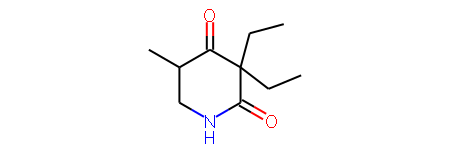

In [164]:
#이중결합 확인하기
def hasdoublebond(m):
    double=0
    for bond in m.GetBonds():
        if bond.GetBondType() == rdkit.Chem.BondType.DOUBLE:
            double += 1
        else:
            continue
    return double

hasdoublebond(mols[2])


In [10]:
# 1부터 10000까지 8이라는 숫자는 몇번 나오는가??

합=0
일부터만까지 = []
for i in range(1,10000):
    일부터만까지.append(i)

a = str(일부터만까지)

print(a.count("8"))
   
        

4000


In [11]:
# 문자열을 입력받고 같은문자가 연속적으로 반복되는 경우에 그 반복 횟수를 표시하여 문자열을 압축하기.

answk = input("입력하신 문자열")
answks = []
cnffur1 = []
cnffur2 = ""
for i in answk:
    answks.append(i)

answktpt = set(answks)
wndqhrwprj = list(answktpt)
wjdfuf = sorted(wndqhrwprj)


for i in wjdfuf:
    cnffur1.append(i)
    cnffur1.append(str(answks.count(i)))
print("출력1 = ",''.join(cnffur1))
print("======")
for j in wjdfuf:
    cnffur2 += j
    cnffur2 += str(answks.count(j))

print("출력2 = ",cnffur2)



입력하신 문자열 safasdf


출력1 =  a2d1f2s2
출력2 =  a2d1f2s2


In [12]:
#1부터 1000까지의 수 중에서 모든 3의 배수와 모든5의 배수의 합을 구하기
count = 0
for i in range(1,1000):
    if (i % 3) == 0 or (i % 5) == 0:
        count += i
print("모든 3의 배수와 5의 배수의 합은",count,"입니다.")

모든 3의 배수와 5의 배수의 합은 233168 입니다.


In [13]:
#페이지갯수 출력
m = int(input("총 게시물 갯수"))
n = int(input("한 페이지에 보여줄 게시물 수"))

if m % n == 0:
    page = m/n
else:
    page = ((m - (m % n)) / n) + 1

print("총 페이지의 갯수는", int(page),"개 입니다.")

총 게시물 갯수 100
한 페이지에 보여줄 게시물 수 10


총 페이지의 갯수는 10 개 입니다.


In [14]:
#1부터 n까지 모든수로 나눠떨어지는 N찾기(큰거못함)

n = int(input("n을 입력하세요"))

i=0

while True:
    i += 1
    flag = True
    for j in range(1,n+1):
        if not i % j == 0:
            flag = False
    if flag == True:
        break
        
print(i)

n을 입력하세요 10


2520


In [15]:
#1부터 n까지 모든수로 나눠떨어지는 N찾기

n = int(input("n을 입력하세요 :"))
thtn = []
dirtn =[]
thtnrhq = 1
times = 0

for i in range(1,n+1):
    dirtn = []
    for j in range(1,n+1):
        if (i % j) == 0:
            dirtn.append(j)
    if len(dirtn) == 2:
        thtn.append(i)

        
for k in thtn:
    thtnrhq *=k

while True:
    flag = True
    times += 1
    num =  thtnrhq * times
    for l in range(1,n+1):
        if not num%l == 0:
            flag = False
    if flag == True:
        N = num 
        break

print("1 부터",n,"까지의 모든 수로 나누어도 나머지가 0인 수는\n",N,"입니다.")

n을 입력하세요 : 10


1 부터 10 까지의 모든 수로 나누어도 나머지가 0인 수는
 2520 입니다.


In [16]:
# 2진법으로 나타내기

n = int(input("이진법으로 나타낼 숫자를 입력하세요 :"))
tmd = []
dlwlsqjq = ""

for i in range(0,n):
    if not 2**i > n:
        tmd.append(i)

tmd.reverse()

for j in tmd:
    if n-(2**j) >= 0:
        dlwlsqjq += "1"
        n = n-(2**j) 
    else:
        dlwlsqjq += "0"

print(dlwlsqjq,"\b(2)")

이진법으로 나타낼 숫자를 입력하세요 : 10


1010(2)


In [17]:
#시저 암호는, 고대 로마의 황제 줄리어스 시저가 만들어 낸 암호인데, 
#예를 들어 알파벳 A를 입력했을 때, 그 알파벳의 n개 뒤에 오는
#(여기서는 예를 들 때 3으로 지정하였다)알파벳이 출력되는 것이다. 
#예를 들어 바꾸려는 단어가 'CAT"고, n을 5로 지정하였을 때 "HFY"가 되는 것이다.
#어떠한 암호를 만들 문장과 n을 입력했을 때 암호를 만들어 출력하는 프로그램을 작성해라.

alp = "AaBbCcDdEeFfGgHhIiJjKkLlMmNnOoPpQqRrSsTtUuVvWwXxYyZzAa"
alplist = list(alp)


n = int(input("옮긴 칸의 숫자를 입력하세요 :"))
dkaghans = str(input("암호화 할 알파벳을 입력하세요"))
dkaghanslist = list(dkaghans)
cnffur = ""

print("예를들어, A ->",alp[n*2])

for i in dkaghanslist:
    for k in range(0,len(alplist)-2):
        if i == alp[k]:
            cnffur += alplist[k+n*2]
print(cnffur)

옮긴 칸의 숫자를 입력하세요 : 2
암호화 할 알파벳을 입력하세요 AS


예를들어, A -> C
CU


In [18]:
#https://codingdojang.com/scode/365?answer_mode=hide
def d(a):
    l = list(str(a))
    for i in range(0,len(l)):
        a += int(l[i])
    return a

selfn = []

for i in range(1,5001):
    selfn.append(i)


for j in range(1,5001):
    if selfn.count(d(j)):
        selfn.remove(d(j))


sum=0

for k in selfn:
    sum += k
    
print(sum)

1227365


In [19]:
#대각선 길이 구하기
#https://codingdojang.com/scode/672?answer_mode=hide
import math

def 대각선(a,b):
    return math.sqrt(a**2 + b**2)

대각선(4,5)

6.4031242374328485

In [20]:
# X진법으로 나타내기


x = int(input("X진법으로 나타낼 X를 입력하세요"))
n = int(input("X진법으로 나타낼 수를 입력하세요"))


wlstn = ""

for i in range(n,0,-1):
    if n - x**i >= 0:
        big = i
        break

for j in range(big,0,-1):
    if n == (x**j):
        wlstn += "1"
        n = 0
        break
    else:
        if n // (x**j) > 0:
            wlstn += str(n // (x**j))
            n = n - ((n // (x**j)) * (x**j))
        else:
            wlstn += "0"

if not n == 0:    
    wlstn += str(n)
else:
    for k in range(0,j):
        wlstn += "0"

print(wlstn,"(",x,")")

X진법으로 나타낼 X를 입력하세요 8
X진법으로 나타낼 수를 입력하세요 1000


1750 ( 8 )


In [14]:
#원자가 20개인것들의 번호를 출력
import rdkit
from rdkit import Chem 
from rdkit.Chem import AllChem

sup = Chem.SDMolSupplier("drugs.sdf")
atom20 = []

for i in range(0,len(sup)):
    m = sup[i]
    num_atom = m.GetNumAtoms()
    if num_atom ==20:
        atom20.append(i+1)
        
print(atom20)



[17, 23, 25, 31, 36, 61, 72, 77, 95, 99, 121, 124, 174, 242, 303, 329, 338, 367, 387, 396, 419, 496, 555, 559, 581, 602, 703, 722]


In [29]:
#https://codingdojang.com/scode/410?answer_mode=hide

S = "이유덕,이재영,권종표,이재영,박민호,강상희,이재영,김지완,최승혁,이성연,박영서,박민호,전경헌,송정환,김재성,이유덕,전경헌"
L = S.split(",")

김=0
이=0
count = 0

for i in L:
    if i[0] == "김":
        김+=1
    elif i[0] == "이":
        이+=1

print("1. 김씨는 ",김,"명입니다.(중복제거 전)")
print("   이씨는 ",이,"명입니다.(중복제거 전)")

for i in L:
    if i == "이재영":
        count +=1
print("2. 이재영은",count,"번 반복됩니다.")

wndqhrwprjL = []

for i in L:
    if not (i in wndqhrwprjL) == True:
        wndqhrwprjL.append(i)


print("3.",','.join(wndqhrwprjL))

wndqhrwprjL.sort()

print("4.",','.join(wndqhrwprjL))



1. 김씨는  2 명입니다.(중복제거 전)
   이씨는  6 명입니다.(중복제거 전)
2. 이재영은 3 번 반복됩니다.
3. 이유덕,이재영,권종표,박민호,강상희,김지완,최승혁,이성연,박영서,전경헌,송정환,김재성
4. 강상희,권종표,김재성,김지완,박민호,박영서,송정환,이성연,이유덕,이재영,전경헌,최승혁


In [133]:
#https://codingdojang.com/scode/442?answer_mode=hide
import math
a = int(input("변의길이 1 :"))
b = int(input("변의길이 2 :"))
c = int(input("변의길이 3 :"))
Flag =True
quss = [a,b,c]
quss.sort(reverse = True)

if quss[0] >= (quss[1]+quss[2]):
    print("삼각형이 아닙니다.")
    Flag = False
    
if Flag == True:
    for i in range(0,len(quss)):
        j = quss[i]
        if j>1000000:
            print(i+1,"번째의 변의길이가 너무 큽니다(1000000이하로 입력)")
            Flag = False
            break
            
if Flag == True:
    qussgkq = a+b+c
    
    s= qussgkq / 2
    sjfqdl = math.sqrt(s*(s-a)*(s-b)*(s-c))
    r = sjfqdl * 2/qussgkq
    print("변의 길이가",quss[0],quss[1],quss[2],"인 삼각형의 반지름은",format(r,".3f"),"입니다.")



변의길이 1 : 12
변의길이 2 : 12
변의길이 3 : 8


변의 길이가 12 12 8 인 삼각형의 반지름은 2.828 입니다.


In [148]:
#https://codingdojang.com/scode/488?answer_mode=hide


n = int(input("숫자를 입력하세요"))

def 판독기(N):
    strN = str(N)
    strNlist = []
    for i in strN:
        strNlist.append(i)
    strNlistset = set(strNlist)
    wndqhrwprj = list(strNlistset)


    if len(wndqhrwprj) == len(strNlist):
        return True
    else:
        return False

판독기(n)

숫자를 입력하세요 123213


False

In [157]:
#https://codingdojang.com/scode/461?answer_mode=hide

n= int(input("구하고싶은 피보나치수열의 항의 갯수를 입력하세요"))

vlqhskcl = [0,1]

for i in range(0,n-2):
    N = vlqhskcl[i]+vlqhskcl[i+1]
    vlqhskcl.append(N)

for j in vlqhskcl:
    print(j)

구하고싶은 피보나치수열의 항의 갯수를 입력하세요 8


0
1
1
2
3
5
8
13


In [205]:
#이중결합 확인하기

def hasdoublebond(m):
    for bond in m.GetBonds():
        if bond.GetBondType() == rdkit.Chem.BondType.DOUBLE:
            return True
    return False


In [202]:
m = Chem.MolFromSmiles('O=C=O')

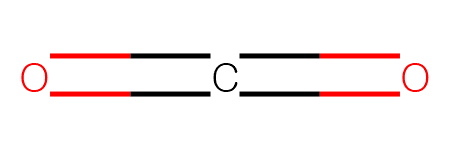

In [204]:
m